In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cwd = os.getcwd()
root_dir = os.path.abspath(os.path.join(cwd, os.pardir))
root_dir

'/home/egianuzzi/Documentos/git/AstroBould'

In [168]:
def read_outfile(name, nboulders=0, coord=False):
    full_name = os.path.join(root_dir, name)
    if not os.path.isfile(full_name):
        print("El archivo %s no existe"%os.path.basename(full_name))
        return
    if coord:
        df = pd.read_csv(full_name, delimiter='\s+', header=None,
                         names=["idx",
                                "merged_to",
                                "t",
                                "x", "y",
                                "vx", "vy",
                                "mass", "radius"])
        df.name = name.split(".")[0]
        df.nt = df.idx.nunique()
        df.nb = nboulders
        df.np = df.nt - nboulders
        df["r"] = np.sqrt(df["x"]**2 + df["y"]**2)
        df["v"] = np.sqrt(df["vx"]**2 + df["vy"]**2)
    else:
        df = pd.read_csv(full_name, delimiter='\s+', header=None,
                         names=["idx",
                                "merged_to",
                                "t",
                                "omega", "theta",
                                "a", "e", "M", "w", "MMR",
                                "amax", "amin", "emax", "emin",
                                "mass", "radius",
                                "dist"]) # Asteroid
        df.name = name.split(".")[0]
        df.tmax = df.t.iloc[-1]
    return df

In [194]:
coord=False
data = read_outfile("salida.out", coord=coord)
data

,idx,merged_to,t,omega,theta,a,e,M,w,MMR,amax,amin,emax,emin,mass,radius,dist
0,1,-1,0.000000,0.0,0.0,1260.500000,0.200000,162.000000,3.600000e+02,16.243546,1260.500000,1260.500000,0.200000,0.200000,7.000000e+16,2.5,1489.086410
1,2,-1,0.000000,0.0,0.0,820.000000,0.300000,0.300000,3.600000e+02,8.565407,820.000000,820.000000,0.300000,0.300000,0.000000e+00,0.0,588.532534
2,3,-1,0.000000,0.0,0.0,320.000000,0.200000,30.300000,2.926110e-13,2.088104,320.000000,320.000000,0.200000,0.200000,0.000000e+00,0.0,277.407861
3,4,-1,0.000000,0.0,0.0,620.000000,0.100000,60.300000,3.053332e-13,5.631379,620.000000,620.000000,0.100000,0.100000,0.000000e+00,0.0,596.264252
4,1,-1,0.005285,0.0,0.0,1260.507099,0.200007,162.383319,1.242275e-02,16.243683,1260.500000,1260.507099,0.200000,0.200007,7.000000e+16,2.5,1489.462410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,4,-1,99.942857,0.0,0.0,619.672618,0.099381,70.258060,3.543569e+01,5.626920,618.657014,620.364339,0.096859,0.101636,0.000000e+00,0.0,1851.084053
13996,1,-1,100.000000,0.0,0.0,1257.349766,0.193919,89.844564,8.378084e-01,16.182690,1250.989927,1260.664176,0.181055,0.200236,7.000000e+16,2.5,2517.127143
13997,2,-1,100.000000,0.0,0.0,822.809893,0.302584,359.908368,1.524251e+01,8.609472,820.000000,823.101029,0.299382,0.302875,0.000000e+00,0.0,1729.012312
13998,3,-1,100.000000,0.0,0.0,326.061983,0.233083,90.251938,2.143115e+02,2.147719,297.004370,334.431147,0.099515,0.243867,0.000000e+00,0.0,1323.300290


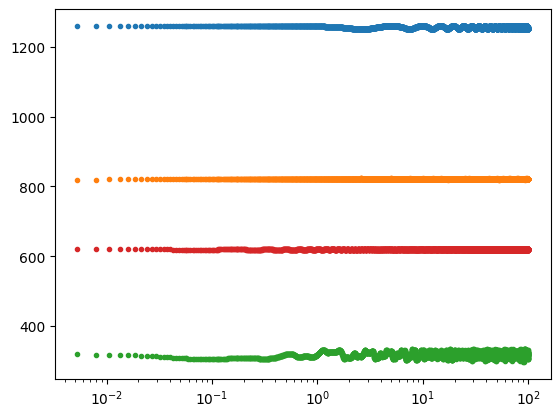

In [195]:
ntot = data.idx.nunique()
if coord:
    data[["x", "y", "vx", "vy"]] = data[["x", "y", "vx", "vy"]].values - np.repeat(data[["x", "y", "vx", "vy"]].values[::ntot], ntot, axis=0)
    for i in range(1,ntot-1):
        plt.plot(data.x.iloc[i::ntot], data.y.iloc[i::ntot], ".")
else:
    for i in range(ntot):
        plt.plot(data.t.iloc[i::ntot], data.a.iloc[i::ntot], ".")
    plt.semilogx()

In [130]:
for i in range(ntot):
    plt.plot(data.t, data.omega, ".")
plt.semilogx()

AttributeError: 'DataFrame' object has no attribute 'omega'